# Toolik Station Air Temperature (1988-2021)

**Data:** Shaver, G. 2019. A multi-year DAILY weather file for the Toolik Field Station at Toolik Lake, AK starting 1988 to present. ver 4. Environmental Data Initiative. [Link](https://doi.org/10.6073/pasta/ce0f300cdf87ec002909012abefd9c5c) (Accessed 2021-08-08).

The data are stored in the `data` subfolder. We'll use the relative path to point to it and read it in using `pandas`.

In [99]:
# Import the libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for nicer plots
import re # regular expressions

# Read the data
toolik_weather = pd.read_csv(
    "../data/raw_data/toolik_weather.csv",
    na_values="#N/A"
    )

In [100]:
# Inspect the data
toolik_weather.shape
toolik_weather.columns

Index(['Year', 'Month', 'Date', 'LTER_Site', 'Station', 'Daily_AirTemp_Mean_C',
       'Flag_Daily_AirTemp_Mean_C', 'Daily_AirTemp_AbsMax_C',
       'Flag_Daily_AirTemp_AbsMax_C', 'Daily_AirTemp_AbsMin_C',
       'Flag_Daily_AirTemp_AbsMin_C', 'Daily_Precip_Total_mm',
       'Flag_Daily_Precip_Total_mm', 'Daily_windsp_mean_msec',
       'FLAG_Daily_windsp_mean_msec', 'Daily_Windspeed_AbsMax_m_s',
       'Daily_globalrad_total_jcm2', 'FLAG_Daily_globalrad_total_mjm2', 'Moss',
       'Soil20cm', 'Comments'],
      dtype='object')

In [101]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        # The re.sub(pat, replacement, str) function searches for all the instances of pattern in the given string, 
        # and replaces them
        s = re.sub(
        # Find a lower case letter or number (group 1)
        # followed by an upper case letter (group 2):
        '([a-z0-9])([A-Z])',
        # Replace with - 
        # \1, the lower case letter, 
        # _, an underscore, and
        # \2, the upper case letter:
        r'\1_\2',
        # Perform the search and replace in 
        # the string s:
        s 
        )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

print(snakecase("HelloWorld"))

hello_world


In [102]:
toolik_weather.columns = [
    snakecase(col_name) for col_name in toolik_weather.columns
]

In [103]:
toolik_weather.columns

Index(['year', 'month', 'date', 'lter_site', 'station',
       'daily_air_temp_mean_c', 'flag_daily_air_temp_mean_c',
       'daily_air_temp_abs_max_c', 'flag_daily_air_temp_abs_max_c',
       'daily_air_temp_abs_min_c', 'flag_daily_air_temp_abs_min_c',
       'daily_precip_total_mm', 'flag_daily_precip_total_mm',
       'daily_windsp_mean_msec', 'flag_daily_windsp_mean_msec',
       'daily_windspeed_abs_max_m_s', 'daily_globalrad_total_jcm2',
       'flag_daily_globalrad_total_mjm2', 'moss', 'soil20cm', 'comments'],
      dtype='object')

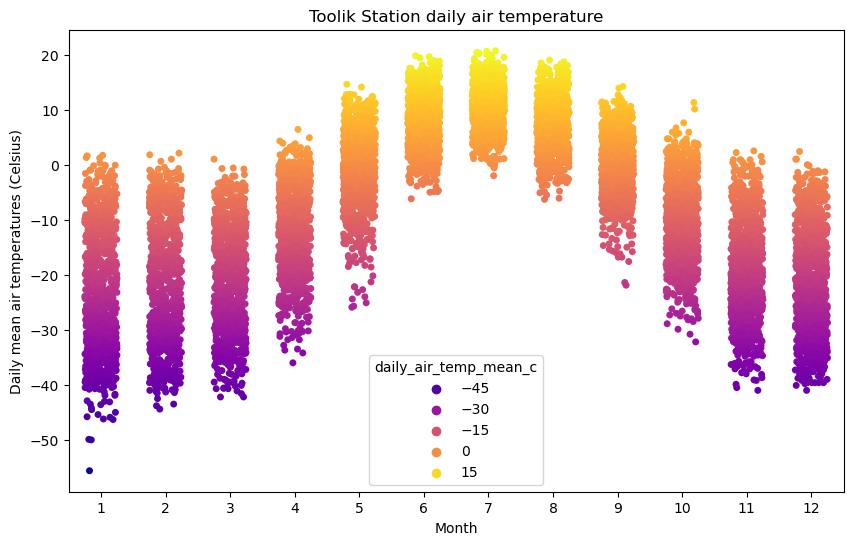

In [147]:
fig = plt.figure(figsize=(10, 6)) # This command sets the size of the figure

sns.stripplot( 
    data=toolik_weather, 
    x='month', 
    y='daily_air_temp_mean_c', 
    jitter=0.25, 
    hue='daily_air_temp_mean_c', 
    palette='plasma' 
)

plt.title("Toolik Station daily air temperature")
plt.xlabel("Month")
plt.ylabel("Daily mean air temperatures (Celsius)")
plt.show()
fig.savefig("../figs/toolik_temp_plot_op.png", dpi=300)

In [105]:
# Read a set of data from a long-term water quality study at Elkhorn Slough, CA
# Azevedo Pond (AP) site
elkhorn_data_elkap = pd.read_csv(
    "../data/raw_data/ELKAP_WQ_NUT_PAJMET_2003_2019.csv",
    na_values="#N/A"
    )

# North Marsh (NM) site
elkhorn_data_elknm = pd.read_csv(
    "../data/raw_data/ELKNM_WQ_NUT_PAJMET_2003_2019.csv",
    na_values="#N/A"
    )

#Vierra Mouth (VM) site
elkhorn_data_elkvm = pd.read_csv(
    "../data/raw_data/ELKVM_WQ_NUT_PAJMET_2003_2019.csv",
    na_values="#N/A"
    )


In [119]:
# Add site_id and site_description columns to each dataframe
elkhorn_data_elkap.loc[:, "Site"] = "elkap"
elkhorn_data_elkap.loc[:, "Site_Description"] = "Azevedo Pond (AP)"

elkhorn_data_elknm.loc[:, "Site"] = "elknm"
elkhorn_data_elknm.loc[:, "Site_Description"] = "North Marsh (NM)"

elkhorn_data_elkvm.loc[:, "Site"] = "elkvm"
elkhorn_data_elkvm.loc[:, "Site_Description"] = "Vierra Mouth (VM)"

In [120]:
#Combine dataframes into a single dataframe
elkhorn_list = [elkhorn_data_elkap, elkhorn_data_elknm, elkhorn_data_elkvm]
elkhorn_combined_df = pd.concat(elkhorn_list)

In [121]:
# Clean up the dataset names

elkhorn_combined_df.columns = [
    snakecase(col_name) for col_name in elkhorn_combined_df.columns
]

In [122]:
elkhorn_combined_df

,orthophosphate,ammonium,nitrite,nitrate,nitrite_+_nitrate,chlorophyll,temperature_of_water,specific_conductance_,salinity,dissolved_oxygen,air_temperature_,precipitation,year,month,site,site_description
0,0.069200,0.100000,0.03745,0.28755,0.325050,3.890,13.688495,43.957892,28.374262,7.310763,13.134084,37.047,2003,1,elkap,Azevedo Pond (AP)
1,0.030750,0.060000,0.00790,0.07235,0.080250,2.205,13.049405,46.530580,30.161012,7.858333,10.986049,43.901,2003,2,elkap,Azevedo Pond (AP)
2,0.032750,0.130000,0.00410,0.11245,0.116550,2.735,16.642339,44.886633,29.058297,5.898320,11.620464,25.124,2003,3,elkap,Azevedo Pond (AP)
3,0.143500,0.080000,0.01565,0.03300,0.048700,2.345,16.996181,48.179000,31.425972,6.750417,11.300174,63.199,2003,4,elkap,Azevedo Pond (AP)
4,0.092300,0.070000,0.00345,0.01160,0.015100,3.200,19.205914,48.763226,31.868145,8.310685,12.991095,7.106,2003,5,elkap,Azevedo Pond (AP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.018000,0.122000,0.00300,0.05800,0.062000,6.440,15.961761,49.394099,32.333165,7.964953,16.331452,0.762,2019,8,elkvm,Vierra Mouth (VM)
200,0.023333,0.020333,0.00400,0.06000,0.068333,6.660,15.859731,49.119595,32.130190,7.517759,16.913264,2.284,2019,9,elkvm,Vierra Mouth (VM)
201,0.011000,0.129000,0.00600,0.14800,0.154000,6.880,14.605712,50.404261,33.048042,7.062515,14.708501,0.000,2019,10,elkvm,Vierra Mouth (VM)
202,0.014000,0.041000,0.03100,0.14900,0.021000,9.190,13.475608,49.112286,32.076747,8.064627,11.635833,7.359,2019,11,elkvm,Vierra Mouth (VM)


Water quality parameters include a wide range of chemical, physical and biological properties, with six principal indicators: dissolved oxygen, turbidity, pH, bioindicators, nitrate chemicals, and water temperature.

1. Dissolved Oxygen (DO)
Factors affecting levels of dissolved oxygen include sources such as a number of bacteria as well as the water temperature.
Sustainable level of DO for fish: 9.5 mg/L to 12 mg/L

2. Turbidity and Total Suspended Solids (TSS)
Turbidity is a measure of how clean water is and its clarity
Source: https://sinay.ai/en/what-are-the-main-indicators-of-water-quality

3. Nitrates
Optimum nitrate levels vary according to the species. A maximum level of 2 mg NO3-N/l protects most freshwater species with a maximum level of 20 mg NO3-N/l for other animals.

5. pH scale
pH illustrates how acidic or basic a body of water is according to a logarithmic scale, a measurement of alkalinity. The value for pH is expressed on a scale ranging from 0 to 14. Low numbers indicate the degree of acidity in the water; higher numbers how basic water is. A score of 7 is neutral.

6. Water Temperature
The water temperature will also affect other parameters of water quality, such as the dissolved oxygen and vulnerability of organisms to parasites, pollution, and disease.


/Users/oksi/opt/anaconda3/envs/eds217_2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


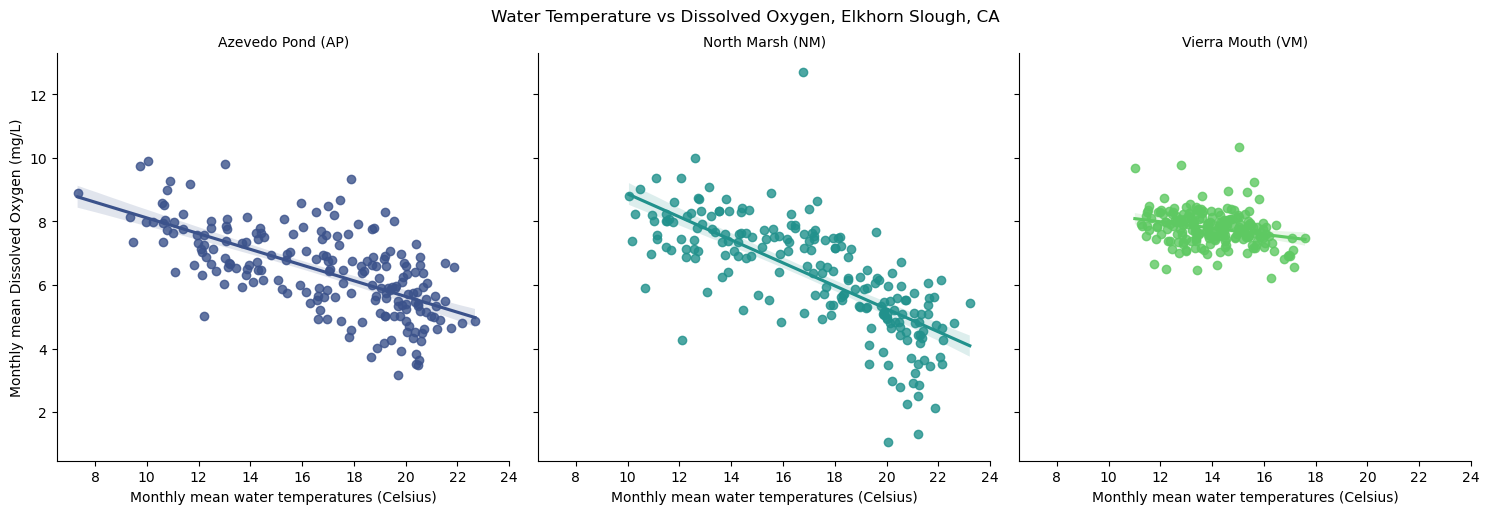

In [165]:
# Create scatterplot with regression line
# Group by site and plot each group as a subplot on separate axis
elkhorn_fig = sns.lmplot( 
    data=elkhorn_combined_df, 
    x='temperature_of_water', 
    y='dissolved_oxygen',
    col = 'site_description',
    hue='site_description',
    palette= 'viridis' 
)

# Set dynamic titles for each subplot
elkhorn_fig.set_titles(col_template="{col_name}")
elkhorn_fig.set_axis_labels("Monthly mean water temperatures (Celsius)", "Monthly mean Dissolved Oxygen (mg/L)")

# Set a title for the entire figure
plt.suptitle("Water Temperature vs Dissolved Oxygen, Elkhorn Slough, CA",  y=1.02)

plt.show()
elkhorn_fig.savefig("../figs/elkhorn_do_temp_plot.png")



In [111]:
# Filter combined dataframe for all rows where site = elkap

elkap_df = elkhorn_combined_df[elkhorn_combined_df["site"] == 'elkap']

In [ ]:
#plt.clf()
plt.savefig("../figs/elkhorn_do_temp_plot.jpg", dpi=300)

/Users/oksi/opt/anaconda3/envs/eds217_2023/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

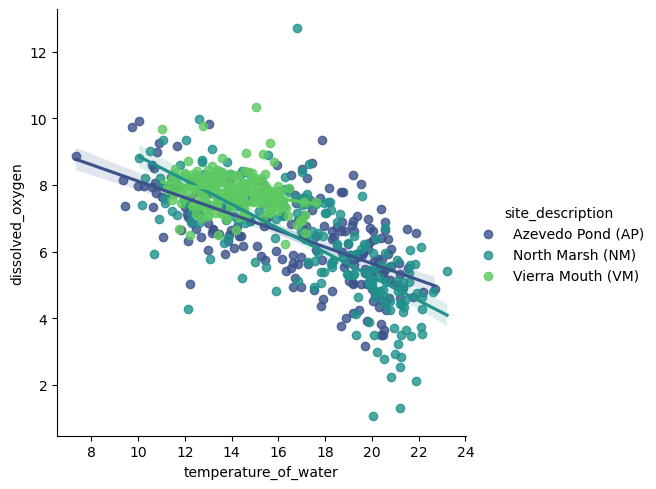

In [157]:
# Create a plot of water quality variables at varying sites, incl. some customization
# Plot DO levels in relationship to Water temperature

fig2 = plt.figure(figsize=(10, 6)) # This command sets the size of the figure
plt.ion()
#sns.stripplot( 
test_fig = sns.lmplot(
    data=elkhorn_combined_df, 
    x='temperature_of_water', 
    y='dissolved_oxygen',
    hue='site_description',
    palette= 'viridis' 
)

#plt.show()
#plt.cla()
#plt.clf()
test_fig.savefig("../figs/test_fig.png", dpi=300)
